## RNN 

In [1]:
from tensorflow.keras.preprocessing.text import one_hot

In [2]:
sent=['the glass of the milk','gijfgis mgjgis jnigjsf','cup of the tea',"I am good developer "]

In [3]:
sent

['the glass of the milk',
 'gijfgis mgjgis jnigjsf',
 'cup of the tea',
 'I am good developer ']

In [4]:
voc_size=1000
one_hot_repr=[one_hot(words,voc_size) for words in sent]
    

In [5]:
one_hot_repr

[[854, 491, 737, 854, 808],
 [683, 861, 425],
 [781, 737, 854, 124],
 [69, 408, 229, 347]]

In [6]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential 
import numpy as np 

in pad_sequences if the count is less than sent_length than it will increase the size by putting 0 


In [7]:
sent_length=8
embedded_docs=pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)


[[  0   0   0 854 491 737 854 808]
 [  0   0   0   0   0 683 861 425]
 [  0   0   0   0 781 737 854 124]
 [  0   0   0   0  69 408 229 347]]


In [8]:
# feature represenation 
dim =10
model=Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length))

c:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
model.compile('adam','mse')

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.predict(embedded_docs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


array([[[ 0.02614044, -0.04795017, -0.02568463,  0.0474895 ,
         -0.02352964, -0.00010217, -0.01018455, -0.02364565,
          0.0280283 ,  0.02932025],
        [ 0.02614044, -0.04795017, -0.02568463,  0.0474895 ,
         -0.02352964, -0.00010217, -0.01018455, -0.02364565,
          0.0280283 ,  0.02932025],
        [ 0.02614044, -0.04795017, -0.02568463,  0.0474895 ,
         -0.02352964, -0.00010217, -0.01018455, -0.02364565,
          0.0280283 ,  0.02932025],
        [-0.01955944, -0.0316151 ,  0.01341088,  0.04135701,
         -0.01673131,  0.00980385, -0.01581851, -0.0432179 ,
         -0.01266373,  0.04589334],
        [-0.03742258, -0.03315173, -0.03510935, -0.04629831,
          0.03930256,  0.04901252,  0.03262952,  0.02698198,
          0.03384768, -0.02926283],
        [ 0.00649966,  0.03849523,  0.03092645, -0.02180227,
          0.01473678, -0.00576835,  0.0033095 ,  0.04511959,
          0.0172284 , -0.0128785 ],
        [-0.01955944, -0.0316151 ,  0.01341088,  0.0

In [12]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [13]:
import numpy as np

sample = np.array(embedded_docs[0]).reshape(1, -1)

model.predict(sample)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[[ 0.02614044, -0.04795017, -0.02568463,  0.0474895 ,
         -0.02352964, -0.00010217, -0.01018455, -0.02364565,
          0.0280283 ,  0.02932025],
        [ 0.02614044, -0.04795017, -0.02568463,  0.0474895 ,
         -0.02352964, -0.00010217, -0.01018455, -0.02364565,
          0.0280283 ,  0.02932025],
        [ 0.02614044, -0.04795017, -0.02568463,  0.0474895 ,
         -0.02352964, -0.00010217, -0.01018455, -0.02364565,
          0.0280283 ,  0.02932025],
        [-0.01955944, -0.0316151 ,  0.01341088,  0.04135701,
         -0.01673131,  0.00980385, -0.01581851, -0.0432179 ,
         -0.01266373,  0.04589334],
        [-0.03742258, -0.03315173, -0.03510935, -0.04629831,
          0.03930256,  0.04901252,  0.03262952,  0.02698198,
          0.03384768, -0.02926283],
        [ 0.00649966,  0.03849523,  0.03092645, -0.02180227,
          0.01473678, -0.00576835,  0.0033095 ,  0.04511959,
          0.0172284 , -0.0128785 ],
        [-0.01955944, -0.0316151 ,  0.01341088,  0.0

# End to End RNN model of deep learning 

In [14]:
import numpy as np 
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding,SimpleRNN, Dense


In [15]:
max_features=10000 ## vocabulary size
(X_train,Y_train),(X_test,Y_Test)=imdb.load_data(num_words=max_features)

In [16]:
sample_review=X_train[0]

In [17]:
sample_review

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
word_index=imdb.get_word_index()

In [19]:
word_index


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [20]:
reverse_word={value:key for key,value in word_index.items()}

In [21]:
reverse_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [22]:
decoded_review=' '.join(reverse_word.get(i-3,'?') for i in sample_review)

In [23]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [40]:
from tensorflow.keras.preprocessing import sequence 
max_len=500
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
X_train.shape

(25000, 500)

In [41]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [26]:
### TRAINING THE SIMPLE RNN FOR THE MODEL


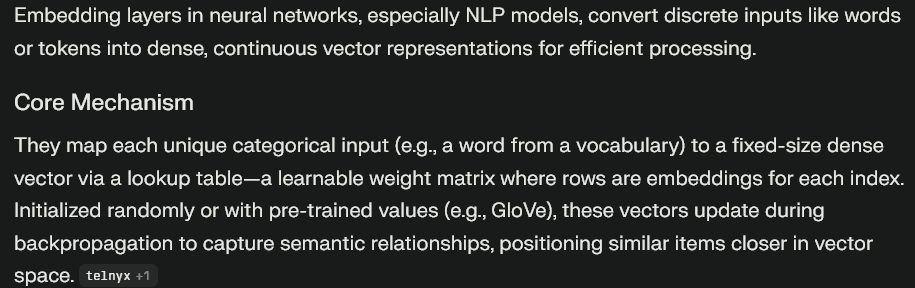

In [42]:
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len)) ## embedding layers 


In [43]:
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('adam','mse')

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
## create instance of earlystopping callback 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [46]:
## Train the model with the early stopping 


In [50]:
model.fit(X_train,Y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks='earlystopping')


AttributeError: 'str' object has no attribute 'set_model'